In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
import yfinance as yf

In [9]:
enb = yf.Ticker("ENB.TO")
enb_df = enb.history(period='max')
enb_df = enb_df.loc['2010':'2021']
enb_df["Return"] = enb_df['Close'].pct_change()
enb_df["Return ewm"] = enb_df["Return"].ewm(span=2, adjust=False).mean()
enb_df["Vol change"] = enb_df['Volume'].pct_change()
enb_df["Volume Diff"] = enb_df["Volume"].diff()
enb_df["Chaikin"] = enb_df["Volume Diff"].ewm(span=3, adjust=False).mean()
enb_df["Chaikin Change"] = enb_df["Chaikin"].pct_change()
enb_df["High/Close"] = (enb_df['High']/enb_df['Close']) - 1
enb_df["Low/Close"] = (enb_df['Low']/enb_df['Close']) - 1
enb_df["High Change"] = enb_df['High'].pct_change()
enb_df["Low Change"] = enb_df['Low'].pct_change()
enb_df["Pos"] = np.where(enb_df['Return'] > 0, '1', '0')
enb_df["Spread"] = enb_df['High'] - enb_df['Low']
enb_df["Spread Change"] = enb_df['Spread'].pct_change()
enb_df = enb_df.dropna()
enb_df.rename(columns = {"Close": "Enb Close"},  inplace = True)
enb_df

,Open,High,Low,Enb Close,Volume,Dividends,Stock Splits,Return,Return ewm,Vol change,Volume Diff,Chaikin,Chaikin Change,High/Close,Low/Close,High Change,Low Change,Pos,Spread,Spread Change
Date,,,,,,,,,,,,,,,,,,,,
2010-01-06,14.928393,15.051261,14.467640,14.559792,2693000.0,0.0,0.0,-0.022681,-0.011999,1.207739,1473200.0,7.105000e+05,-14.611111,0.033755,-0.006329,0.008437,-0.016291,0,0.583621,1.676060
2010-01-07,14.572085,14.608946,14.295634,14.513723,2365600.0,0.0,0.0,-0.003164,-0.006109,-0.121574,-327400.0,1.915500e+05,-0.730401,0.006561,-0.015026,-0.029387,-0.011889,0,0.313312,-0.463158
2010-01-08,14.526006,14.590511,14.464572,14.538293,1656800.0,0.0,0.0,0.001693,-0.000908,-0.299628,-708800.0,-2.586250e+05,-2.350170,0.003592,-0.005071,-0.001262,0.011817,1,0.125939,-0.598040
2010-01-11,14.599724,14.599724,14.375491,14.436925,1818400.0,0.0,0.0,-0.006972,-0.004951,0.097537,161600.0,-4.851250e+04,-0.812421,0.011277,-0.004255,0.000631,-0.006159,0,0.224233,0.780487
2010-01-12,14.390852,14.495290,14.381638,14.427713,1212400.0,0.0,0.0,-0.000638,-0.002076,-0.333260,-606000.0,-3.272562e+05,5.745813,0.004684,-0.003194,-0.007153,0.000428,0,0.113652,-0.493152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,45.230000,45.230000,44.340000,44.880001,14490600.0,0.0,0.0,-0.003110,0.005344,0.222536,2637700.0,2.153833e+06,0.289747,0.007799,-0.012032,0.003327,0.008186,0,0.889999,-0.190911
2021-01-18,44.279999,44.400002,43.580002,44.080002,2922200.0,0.0,0.0,-0.017825,-0.010102,-0.798338,-11568400.0,-4.707284e+06,-3.185538,0.007260,-0.011343,-0.018351,-0.017140,0,0.820000,-0.078651
2021-01-19,44.410000,45.080002,44.009998,44.750000,9668800.0,0.0,0.0,0.015200,0.006766,2.308740,6746600.0,1.019658e+06,-1.216613,0.007374,-0.016536,0.015315,0.009867,1,1.070004,0.304883


In [10]:
enb_df.Dividends.cumsum()

Date
2010-01-06     0.000
2010-01-07     0.000
2010-01-08     0.000
2010-01-11     0.000
2010-01-12     0.000
               ...  
2021-01-15    21.781
2021-01-18    21.781
2021-01-19    21.781
2021-01-20    21.781
2021-01-21    21.781
Name: Dividends, Length: 2772, dtype: float64

In [11]:
oil = yf.Ticker("CL=F")
oil_df = oil.history(period='max')
oil_df = pd.DataFrame(oil_df["Close"])
oil_df = oil_df.loc['2010':'2021']
oil_df = oil_df.dropna()
oil_df["Oil return"] = oil_df['Close'].pct_change()
oil_df.rename(columns = {"Close": "Oil Close"},  inplace = True)
oil_df.head()

,Oil Close,Oil return
Date,,
2010-01-04,81.510002,NaN
2010-01-05,81.769997,0.003190
2010-01-06,83.180000,0.017244
2010-01-07,82.660004,-0.006251
2010-01-08,82.750000,0.001089


In [12]:
gas = yf.Ticker("NG=F")
gas_df = gas.history(period='max')
gas_df = pd.DataFrame(gas_df["Close"])
gas_df = gas_df.loc['2010':'2021']
gas_df = gas_df.dropna()
gas_df["Gas return"] = gas_df['Close'].pct_change()
gas_df.rename(columns = {"Close": "Gas Close"},  inplace = True)
gas_df.head()

,Gas Close,Gas return
Date,,
2010-01-04,5.884,NaN
2010-01-05,5.637,-0.041978
2010-01-06,6.009,0.065993
2010-01-07,5.806,-0.033783
2010-01-08,5.749,-0.009817


In [13]:
sun = yf.Ticker("SU.TO")
sun_df = sun.history(period='max')
sun_df = pd.DataFrame(sun_df["Close"])
sun_df = sun_df.loc['2010':'2021']
sun_df = sun_df.dropna()
sun_df["SU return"] = sun_df['Close'].pct_change()
sun_df.rename(columns = {"Close": "SU Close"},  inplace = True)
sun_df.head()

,SU Close,SU return
Date,,
2010-01-04,28.525635,NaN
2010-01-05,28.845892,0.011227
2010-01-06,29.233198,0.013427
2010-01-07,28.912926,-0.010956
2010-01-08,28.816093,-0.003349


In [14]:
tsx = yf.Ticker("^GSPTSE")
tsx_df = tsx.history(period='max')
tsx_df = pd.DataFrame(tsx_df["Close"])
tsx_df = tsx_df.loc['2010':'2021']
tsx_df = tsx_df.dropna()
tsx_df["TSX return"] = tsx_df['Close'].pct_change()
tsx_df.rename(columns = {"Close": "TSX Close"},  inplace = True)
tsx_df.head()

,TSX Close,TSX return
Date,,
2010-01-04,11866.900391,NaN
2010-01-05,11888.099609,0.001786
2010-01-06,11944.500000,0.004744
2010-01-07,11887.500000,-0.004772
2010-01-08,11953.799805,0.005577


In [15]:
enb_df = pd.concat([enb_df, oil_df, gas_df, sun_df, tsx_df], axis=1, join="inner")
enb_df["Pos"] = enb_df["Pos"].shift(-1)
enb_df = enb_df.dropna()

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt

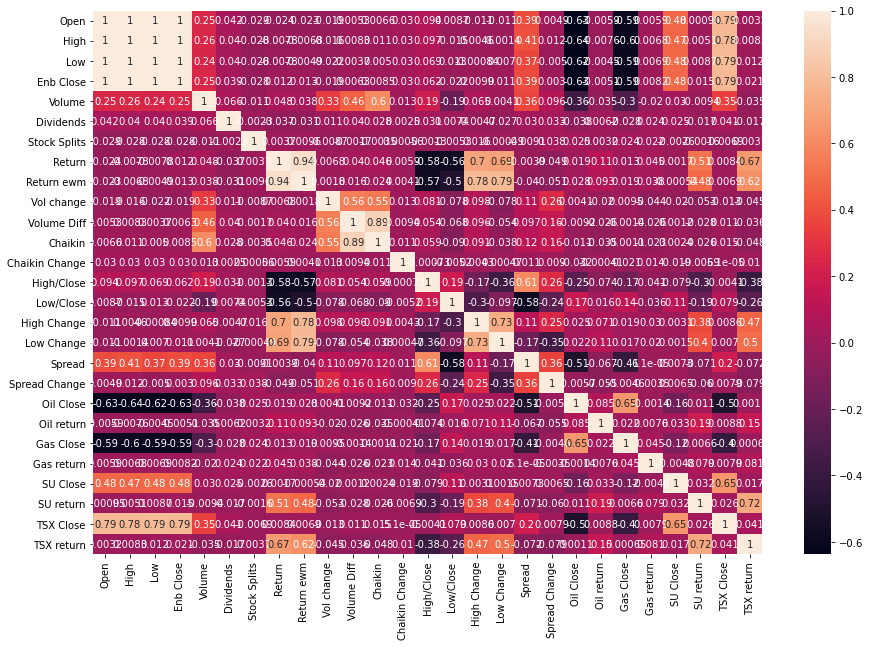

In [17]:
corrmat = enb_df.corr()
fig, heat = plt.subplots(figsize = (15, 10))
heat = sn.heatmap(corrmat, annot=True)
plt.show()

In [18]:
enbmodel_df = enb_df[["High Change", "Low Change", "High/Close", "Low/Close","Spread", "Spread Change", "Volume Diff", "Vol change", "Return ewm",  "Oil return", "SU return", "TSX return", "Gas return", "Return", "Chaikin", "Chaikin Change", "Pos"]]
enbmodel_df

,High Change,Low Change,High/Close,Low/Close,Spread,Spread Change,Volume Diff,Vol change,Return ewm,Oil return,SU return,TSX return,Gas return,Return,Chaikin,Chaikin Change,Pos
Date,,,,,,,,,,,,,,,,,
2010-01-06,0.008437,-0.016291,0.033755,-0.006329,0.583621,1.676060,1473200.0,1.207739,-0.011999,0.017244,0.013427,0.004744,0.065993,-0.022681,7.105000e+05,-14.611111,0
2010-01-07,-0.029387,-0.011889,0.006561,-0.015026,0.313312,-0.463158,-327400.0,-0.121574,-0.006109,-0.006251,-0.010956,-0.004772,-0.033783,-0.003164,1.915500e+05,-0.730401,1
2010-01-08,-0.001262,0.011817,0.003592,-0.005071,0.125939,-0.598040,-708800.0,-0.299628,-0.000908,0.001089,-0.003349,0.005577,-0.009817,0.001693,-2.586250e+05,-2.350170,0
2010-01-11,0.000631,-0.006159,0.011277,-0.004255,0.224233,0.780487,161600.0,0.097537,-0.004951,-0.002779,-0.002843,-0.000561,-0.051313,-0.006972,-4.851250e+04,-0.812421,0
2010-01-12,-0.007153,0.000428,0.004684,-0.003194,0.113652,-0.493152,-606000.0,-0.333260,-0.002076,-0.020965,-0.018403,-0.010622,0.025119,-0.000638,-3.272562e+05,5.745813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,0.023494,0.011546,0.001138,-0.023208,1.070000,0.945443,-4180500.0,-0.357959,0.018062,-0.005638,-0.017939,-0.002841,-0.009444,0.023045,-1.014769e+06,-1.471774,1
2021-01-14,0.024545,0.024458,0.001333,-0.023101,1.100002,0.028040,4354700.0,0.580766,0.022251,0.012474,0.042481,0.001305,-0.022369,0.024346,1.669966e+06,-2.645661,0
2021-01-15,0.003327,0.008186,0.007799,-0.012032,0.889999,-0.190911,2637700.0,0.222536,0.005344,-0.022587,-0.048085,-0.002734,0.026632,-0.003110,2.153833e+06,0.289747,1


In [19]:
enb_csv_data = enbmodel_df.to_csv('enb_posneg.csv', index = True) 

In [20]:
back_df = enb_df[["Open", "Dividends", "High Change", "Low Change", "High/Close", "Low/Close", "Spread", "Spread Change", "Volume Diff", "Vol change", "Return ewm",  "Oil return", "SU return", "TSX return", "Gas return", "Return", "Chaikin", "Chaikin Change", "Pos"]]
back_csv_data = back_df.to_csv('eng_open.csv', index = True) 